In [9]:
from trig_poly import TrigPoly
import matplotlib.pyplot as plt
import numpy as np
from test_data import jittered_supports, uniform_supports
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set up a generic t-axis to use for plotting
N_TICKS = 1000
t = np.linspace(-0.5, 0.5, N_TICKS)

### Visualize dirichlet kernel for a few values of $f_c$

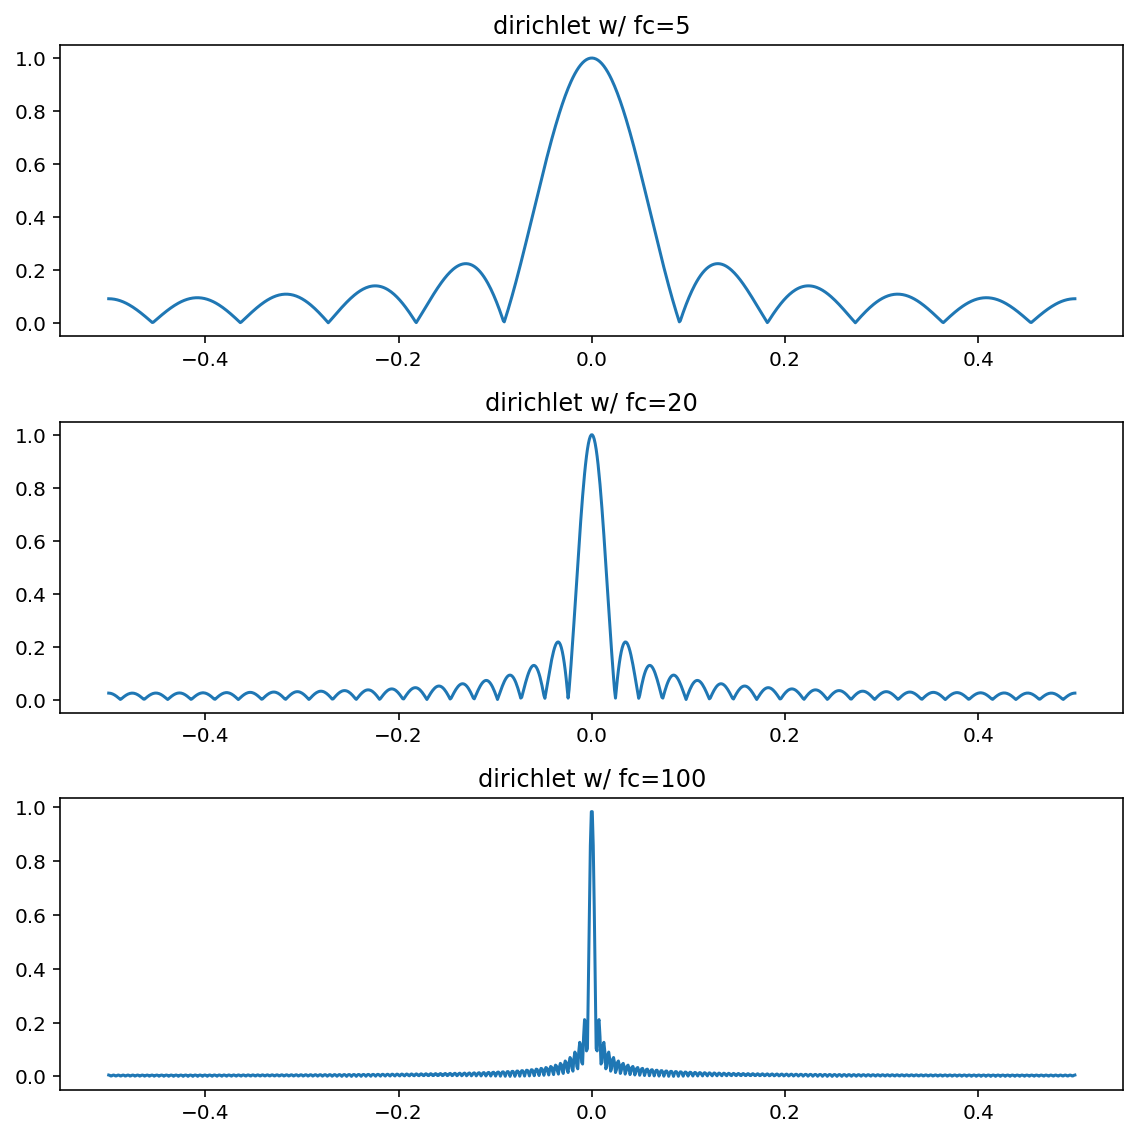

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.dirichlet(fc).eval(t)))
    axs[i].set_title(f"dirichlet w/ fc={fc}")

### Visualize multi-dirichlet kernel for a few values of $f_c$, with gammas=[0.5,0.5] (squared kernel)

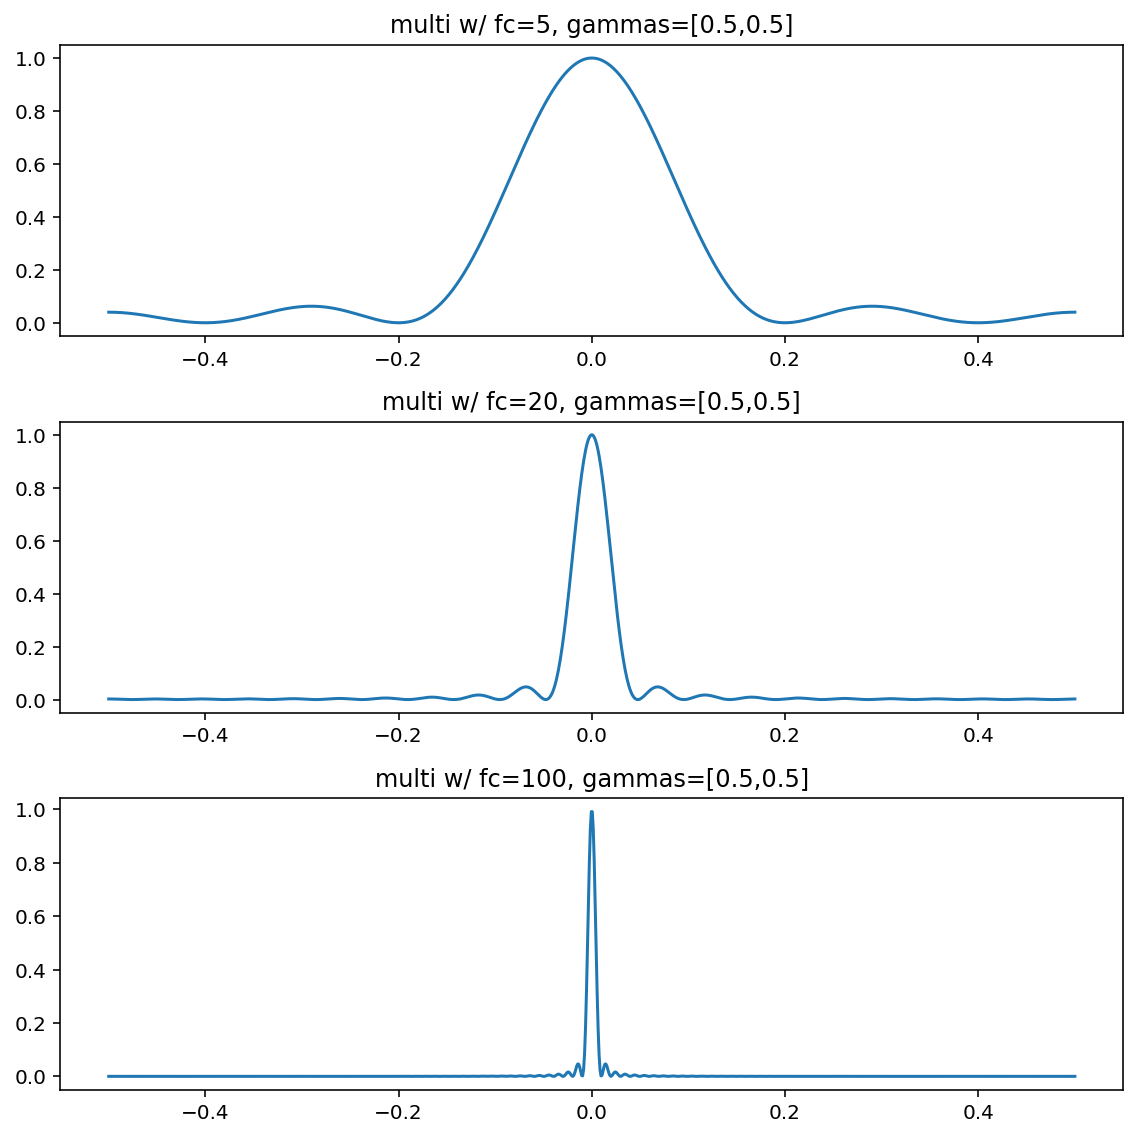

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.multi_dirichlet(fc, [0.5, 0.5]).eval(t)))
    axs[i].set_title(f"multi w/ fc={fc}, gammas=[0.5,0.5]")

### Experiment with pairs of gammas

In [5]:
GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
gammas = [(g, 1 - g) for g in GAMMA_1S]

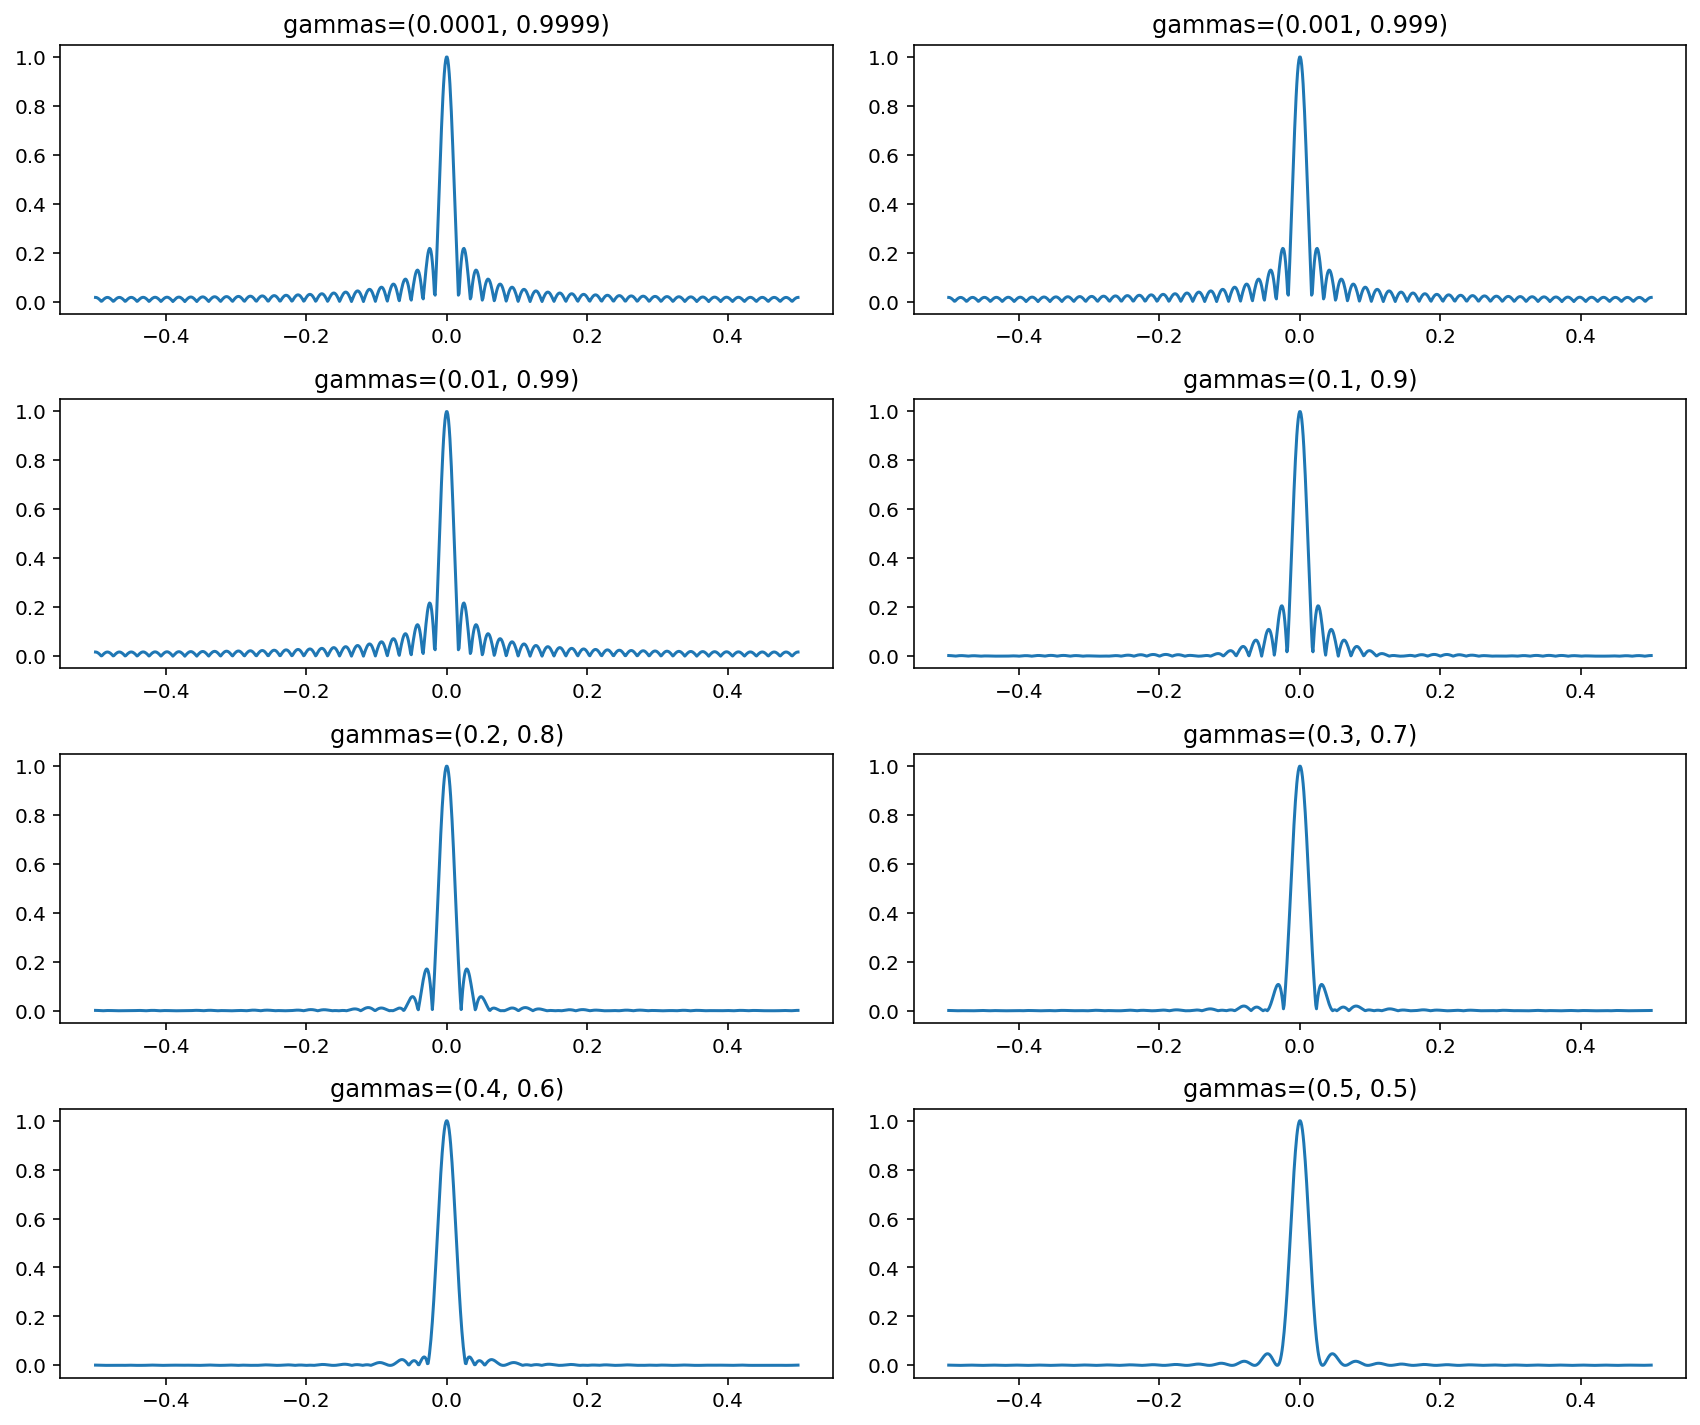

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
fig.set_tight_layout(True)
for i in range(8):
    axs.flatten()[i].plot(t, np.abs(TrigPoly.multi_dirichlet(30, gammas[i]).eval(t)))
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")

In [7]:
# from Kernel Matrix Analysis notebook
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

### Visualize kernel matrices for multidirichlet kernels with different gamma pairs

#### min_sep = 0.9 / FC

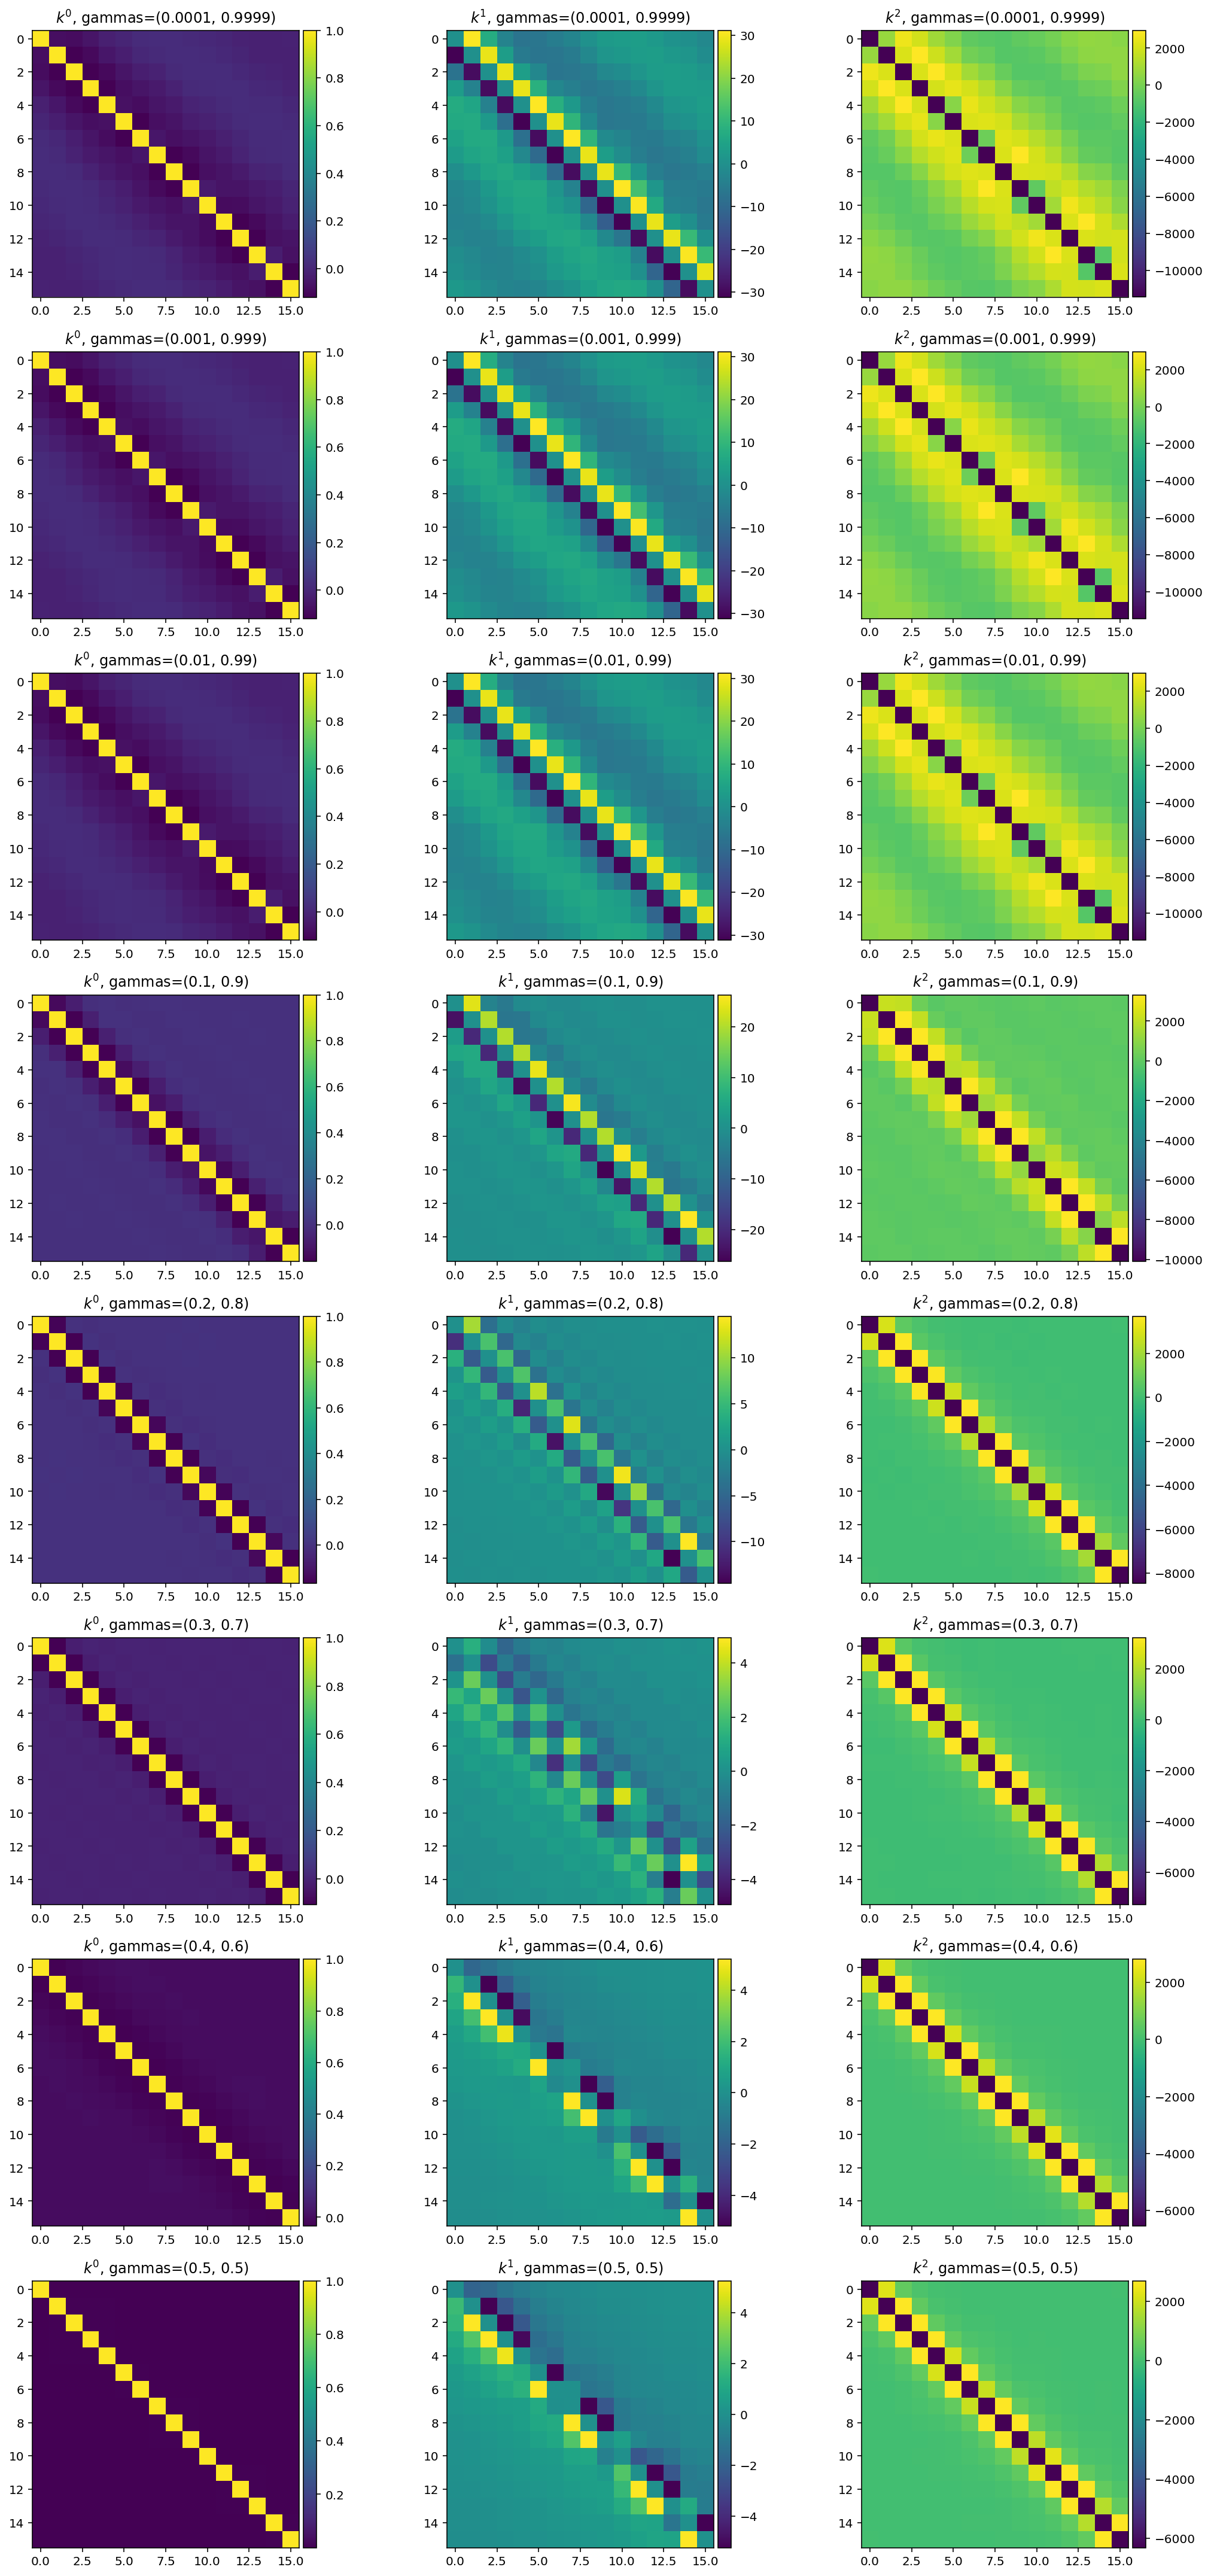

In [37]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.55 / FC

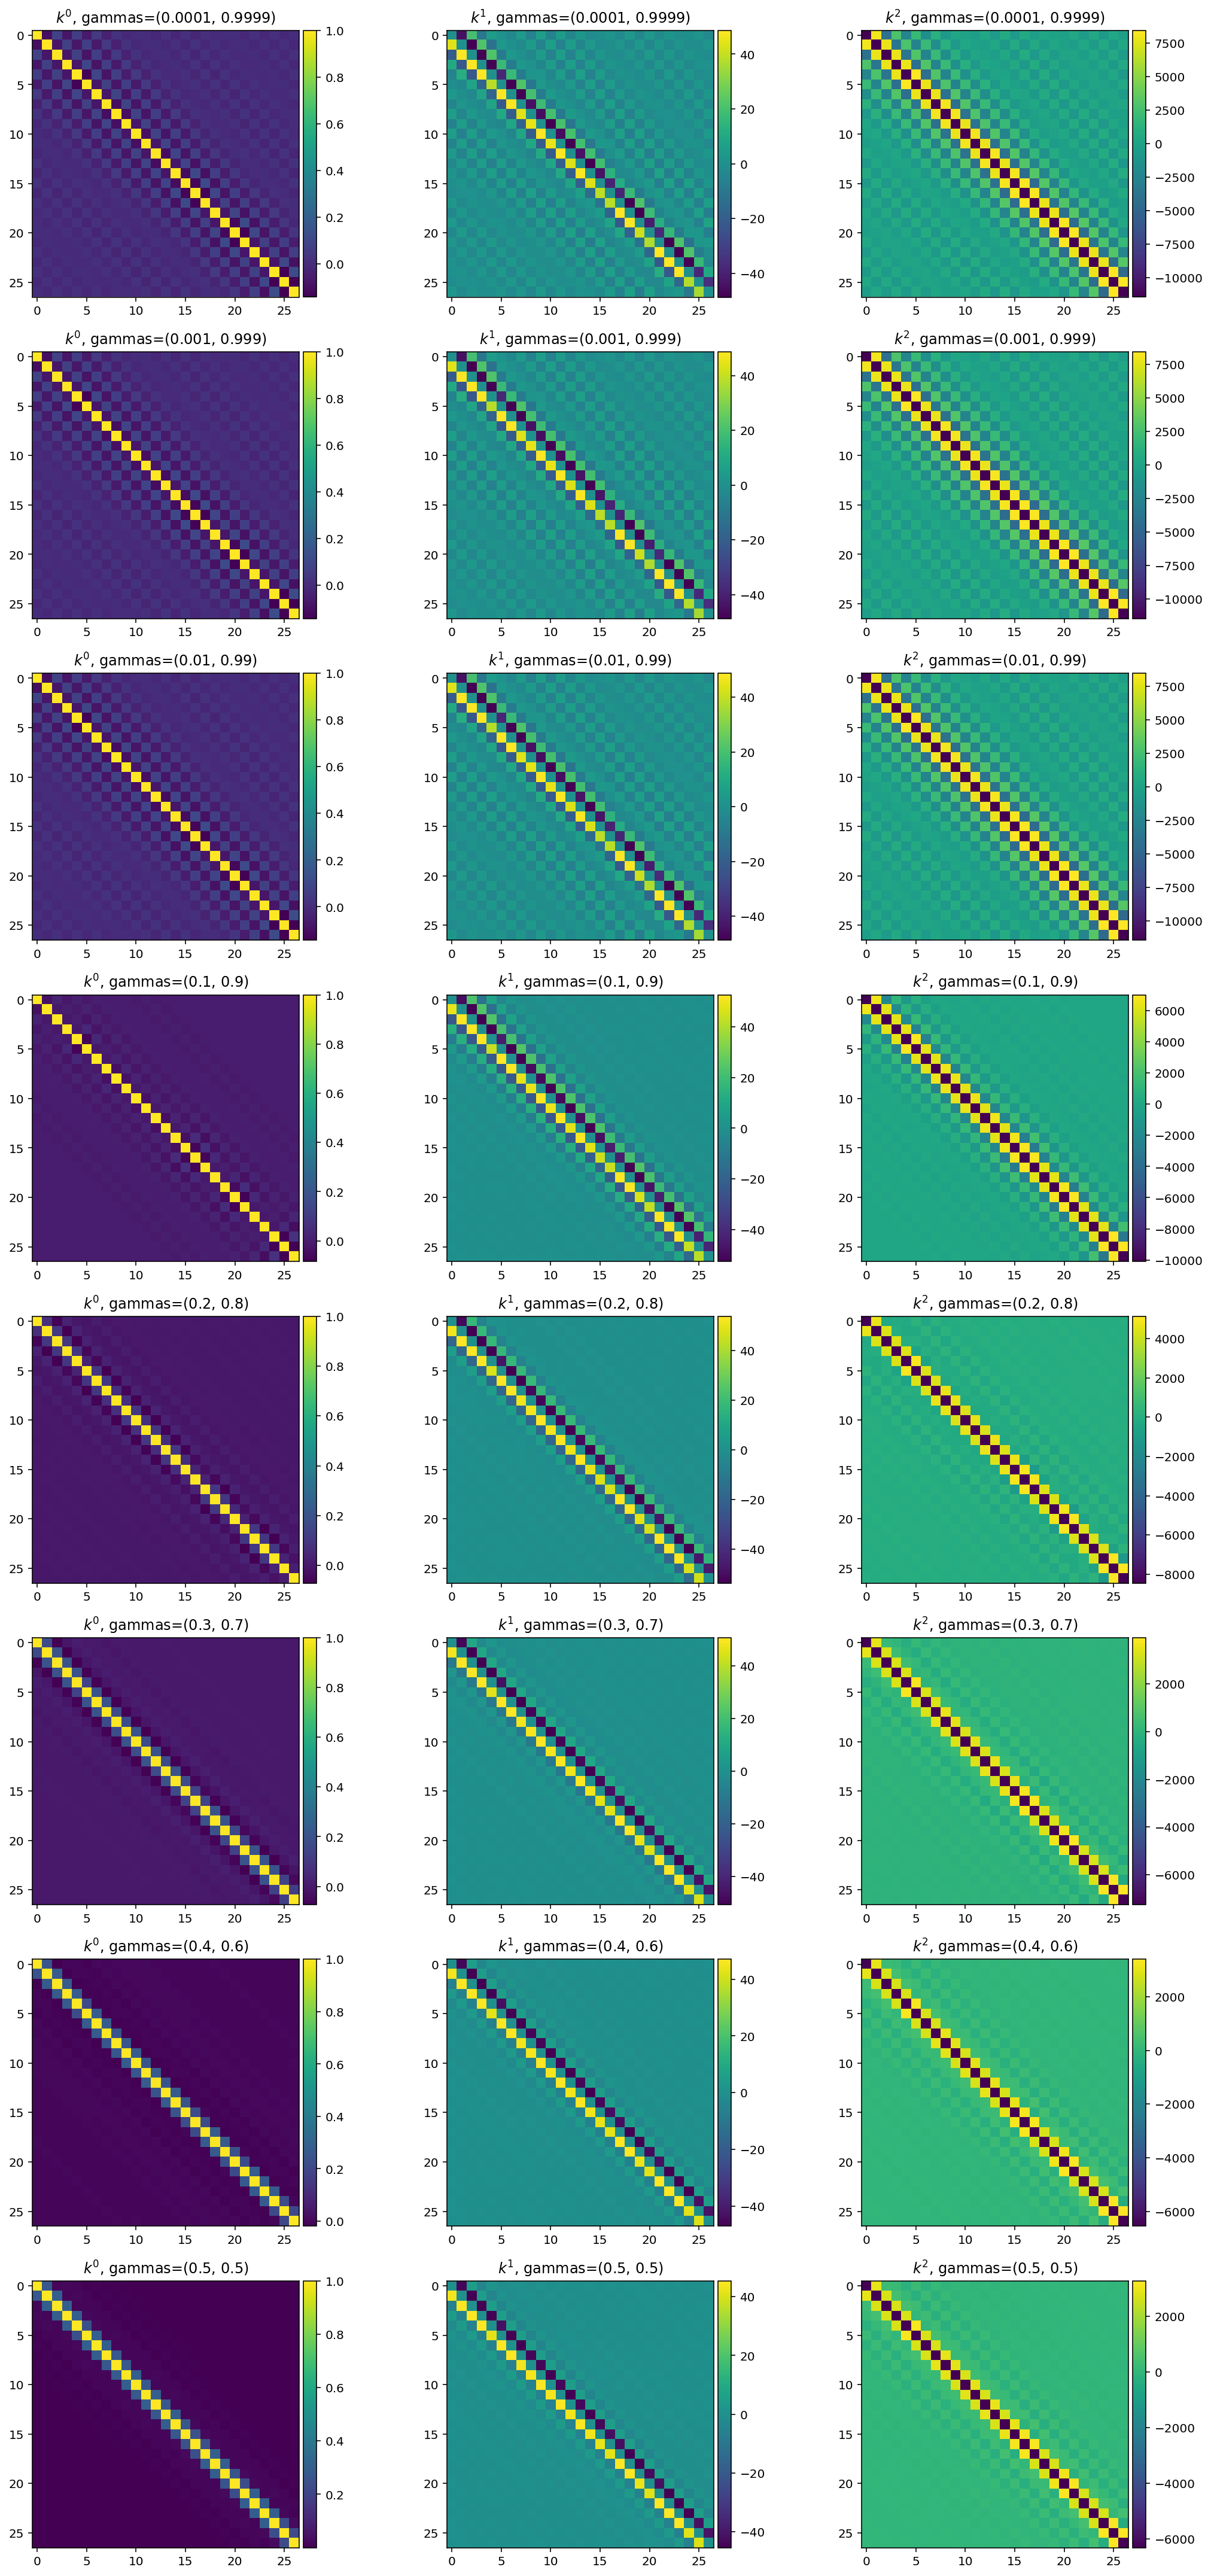

In [38]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.55

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.45 / FC

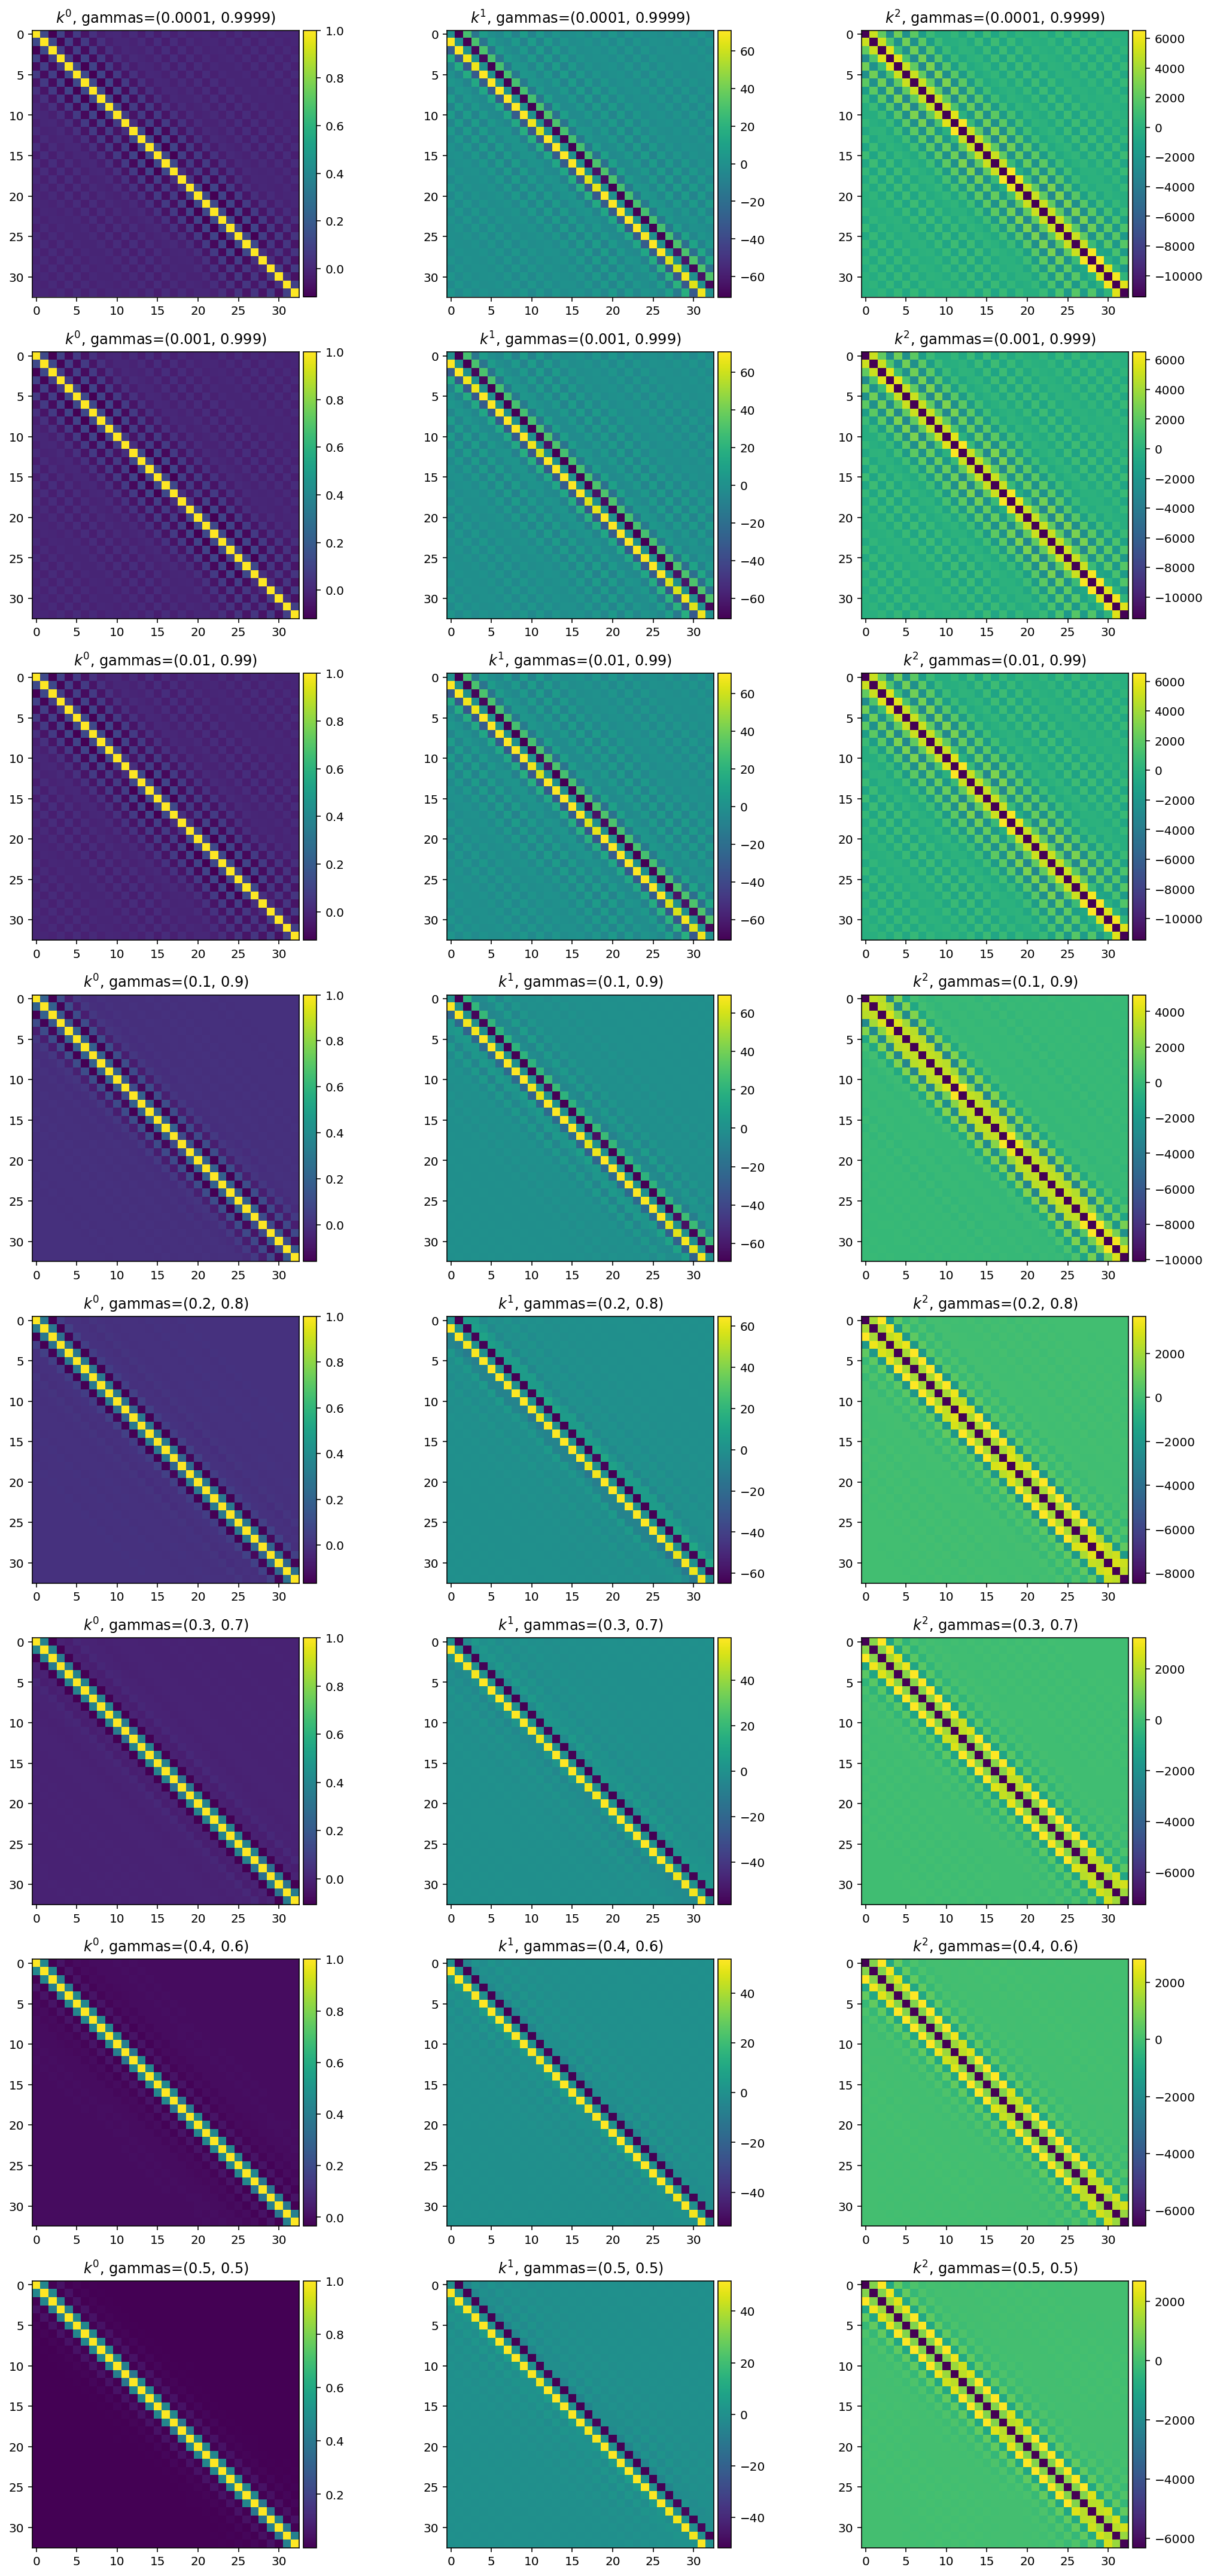

In [39]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.45

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

### Next step: how small do eigenvalues get for each K0, and what are L-infinity norms of $K_0^{-1}k_0(t)$ and $K_0^{-1}K_1$

### Eigenvalues of $K_0$—don't want these to get too small

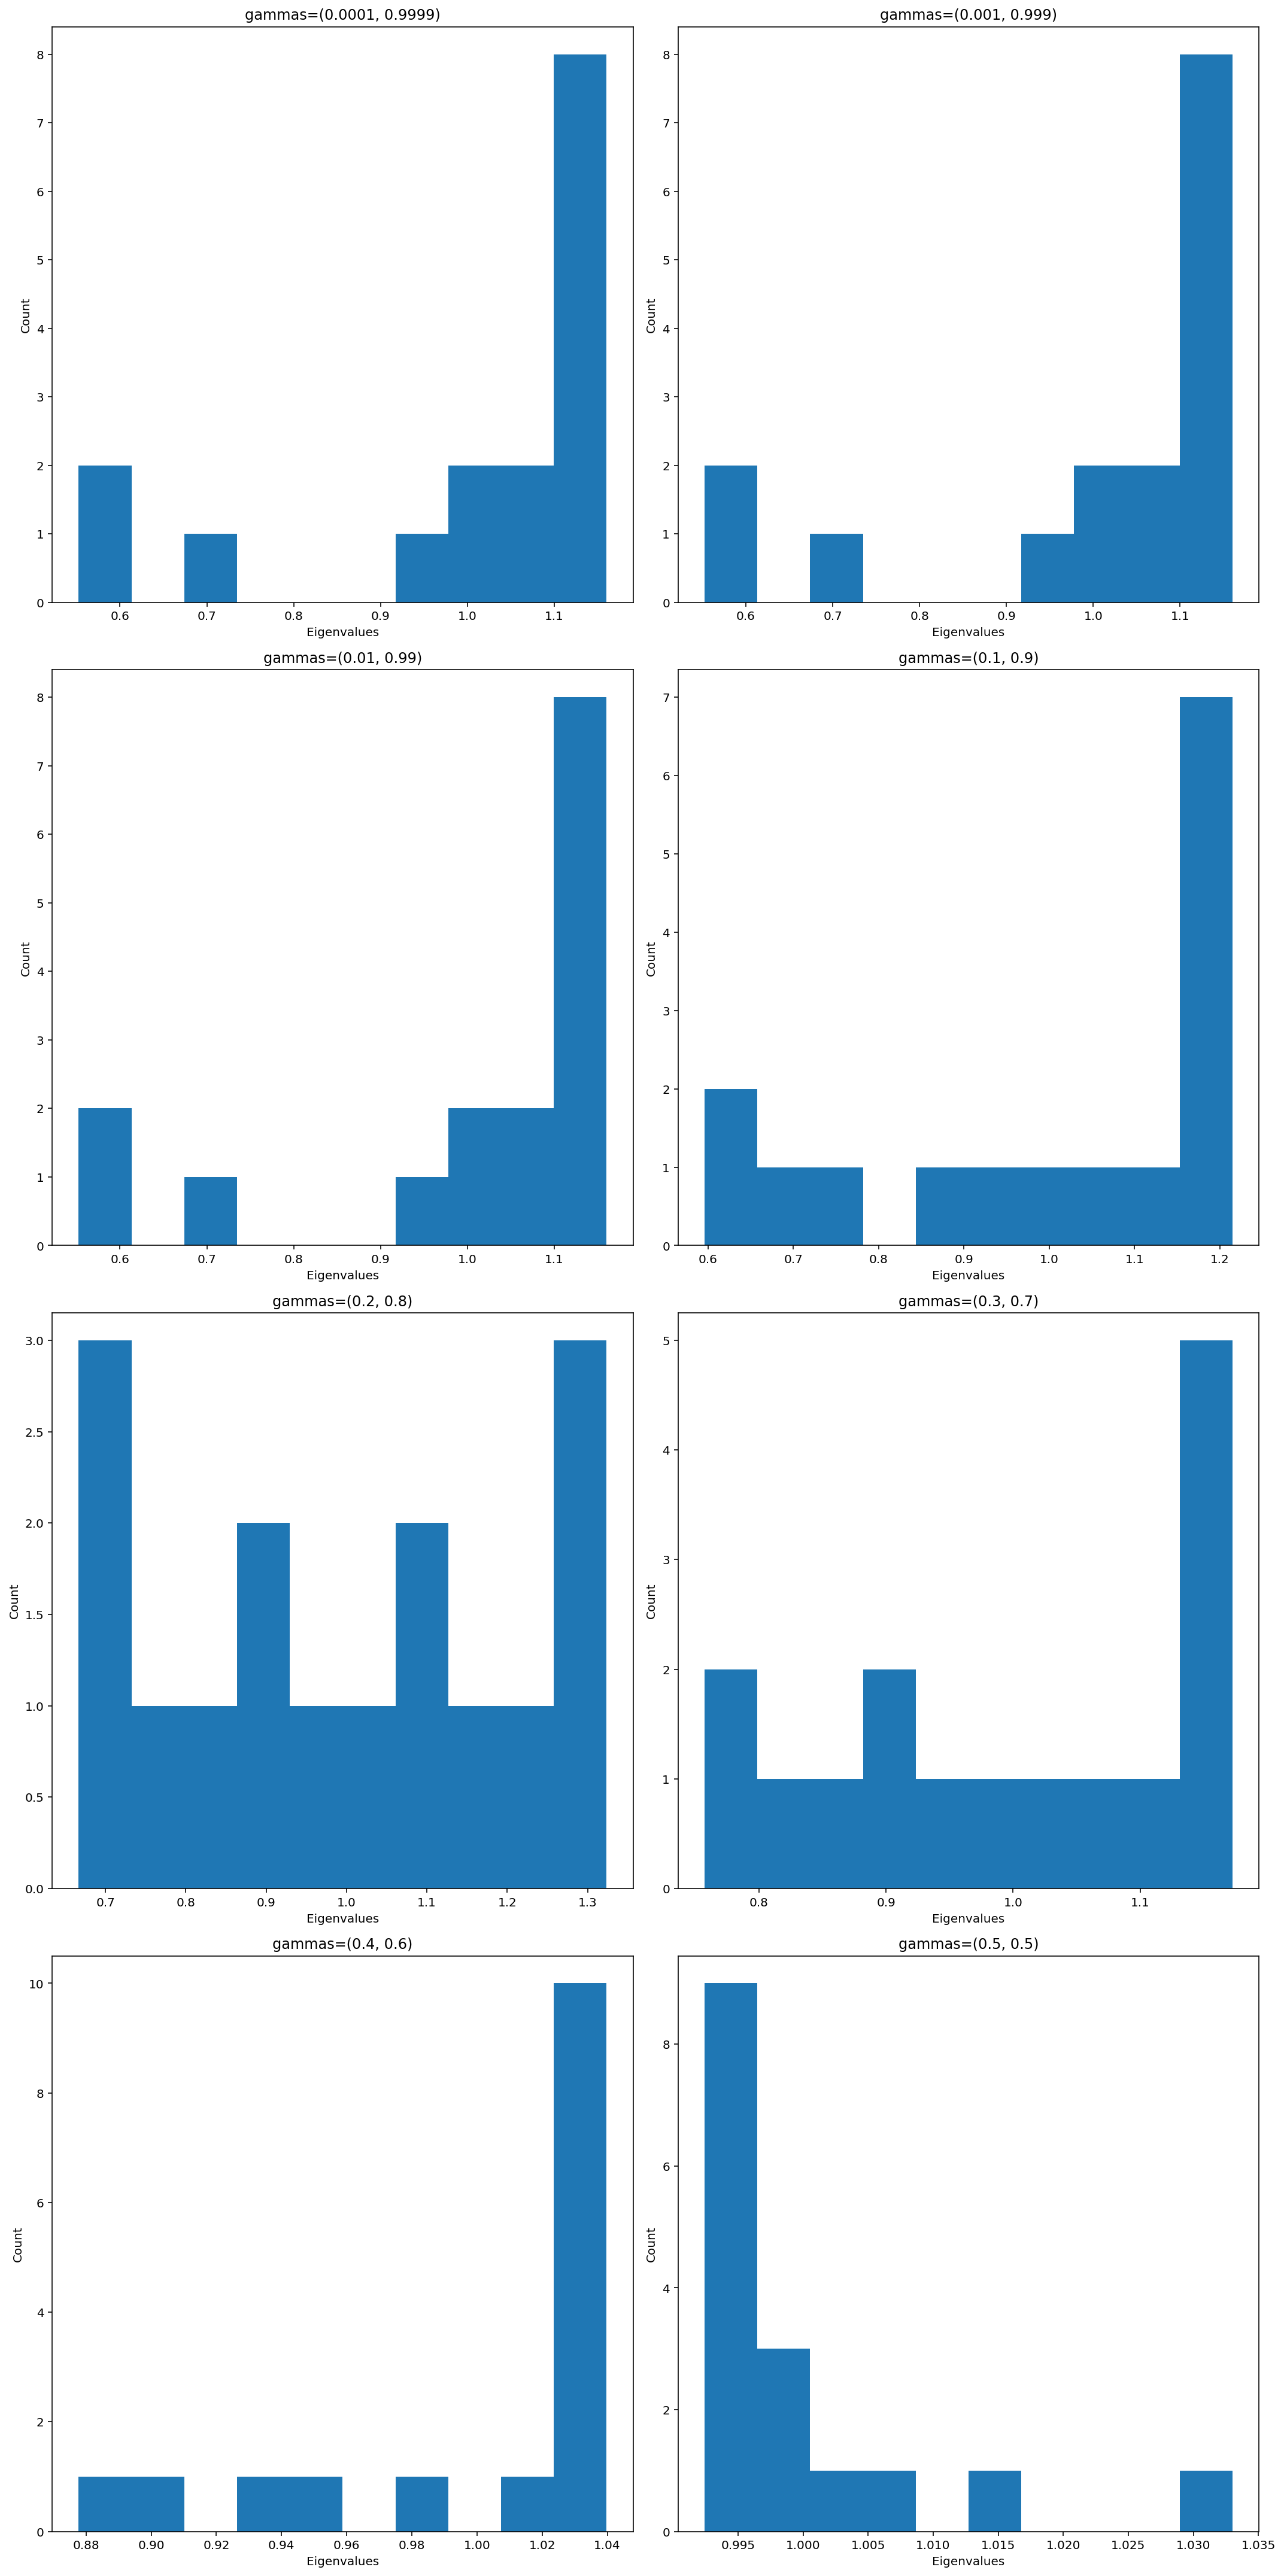

In [41]:
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(4, 2, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    val, vec = np.linalg.eig(K0)
    eigenval = abs(val)
    axs.flatten()[i].hist(eigenval)
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")
    axs.flatten()[i].set_xlabel("Eigenvalues")
    axs.flatten()[i].set_ylabel("Count")

### $L_{\infty}$ norms of $K_0^{-1}K_1$, don't want these too high

In [31]:
fc = 30
min_separation = 0.65 / (2.0 * fc + 1)
N = int(0.5 / min_separation)
support = uniform_supports(N, min_separation=min_separation)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(np.linalg.solve(K0,K1),np.inf)
    print("Gammas:", gammas[i], norm)

Gammas: (0.0001, 0.9999) 1216.616228148484
Gammas: (0.001, 0.999) 1216.616228148484
Gammas: (0.01, 0.99) 1216.616228148484
Gammas: (0.1, 0.9) 898.962533623662
Gammas: (0.2, 0.8) 891.5934562765021
Gammas: (0.3, 0.7) 891.1089538776856
Gammas: (0.4, 0.6) 890.933814777972
Gammas: (0.5, 0.5) 891.0026104063365


### $L_{\infty}$ norms of $K_0^{-1}k_0(t)$, don't want these too high

In [33]:
# todo
# pick values of t where it is a midpt between support points

TODO:

To start:
Pick 1 coordinate of $K_0^{-1}k_0(t)$ ($t$ is a midpt between supports) and plot this coordinate.

- it should be 1 at the first time point

Then fix min_sep:

- plot the full second term $D_{\beta}[k_1(t)-K_1K_0^{-1}k_0(t)]$ (and/or possibly the two inner terms separately). 
- It should be 0 at the first time point, but then what?
- are the two terms $k_1(t)$ and $K_1K_0^{-1}k_0(t)$ close to each other?
- is the difference way smaller than the first term?